 # COUSTMER SEGMENTATION

In [526]:
!pip install yellowbrick

# Importing libraries

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [528]:
customer_data = pd.read_csv("Mall_Customers.csv")  #reading csv file

# Exploring data present in  Mall_Customers.csv file

In [529]:
print(customer_data.head())   # print first 5 rows of data


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [530]:
print(customer_data.info())   # print structure of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [531]:
print(customer_data.columns)  # print column names

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [532]:
customer_data.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [533]:
customer_data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [534]:
np.std(customer_data['Age'])

13.934041050606966

In [535]:
np.std(customer_data['Annual Income (k$)'])

26.19897707926782

In [536]:
np.mean(customer_data['Annual Income (k$)'])


60.56

In [537]:
np.mean(customer_data['Age'])

38.85

In [538]:
np.std(customer_data['Spending Score (1-100)'])

25.75888196331509

# Customer Gender Visualization

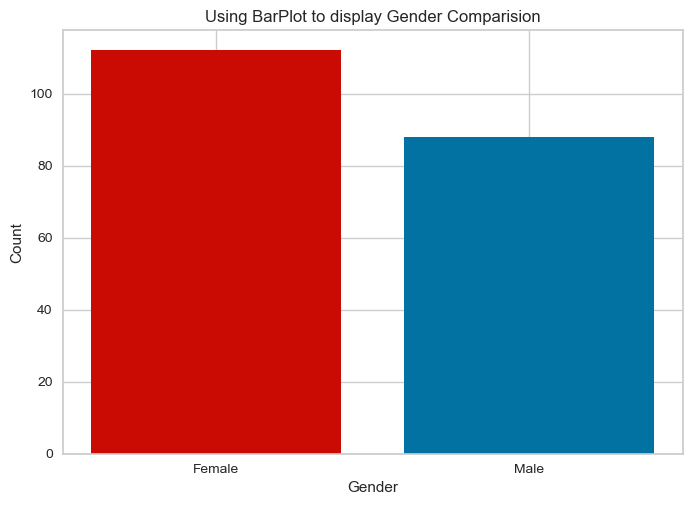

In [539]:
df = pd.DataFrame(customer_data)
# use the `value_counts()` function to count the number of each gender
a = df['Gender'].value_counts()

# create a bar plot
plt.bar(a.index, a.values, color=['r', 'b'])
plt.title("Using BarPlot to display Gender Comparision")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



# Visualization of Age Distribution

In [540]:
customer_data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

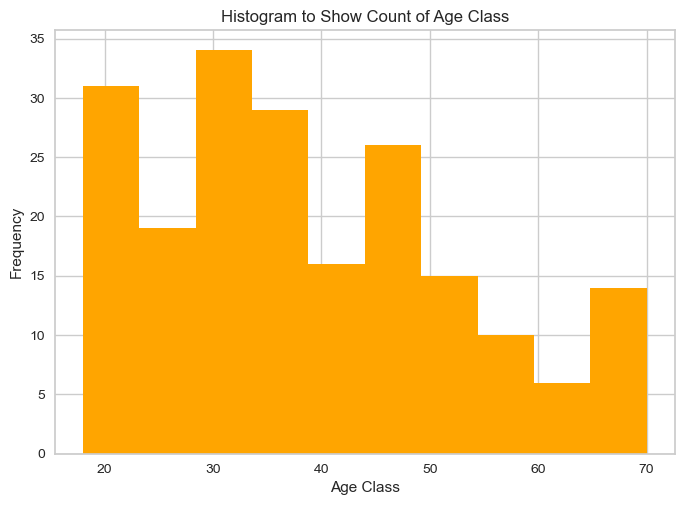

In [541]:
import matplotlib.pyplot as plt

plt.hist(customer_data['Age'], color='orange')
plt.title('Histogram to Show Count of Age Class')
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.show()


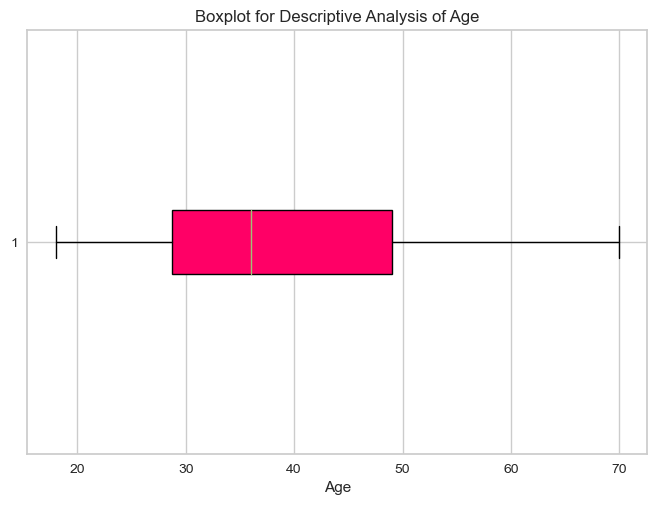

In [542]:
plt.boxplot(customer_data['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='#ff0066'))
plt.title('Boxplot for Descriptive Analysis of Age')
plt.xlabel('Age')
plt.show()

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

# Analysis of the Annual Income of the Customers

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


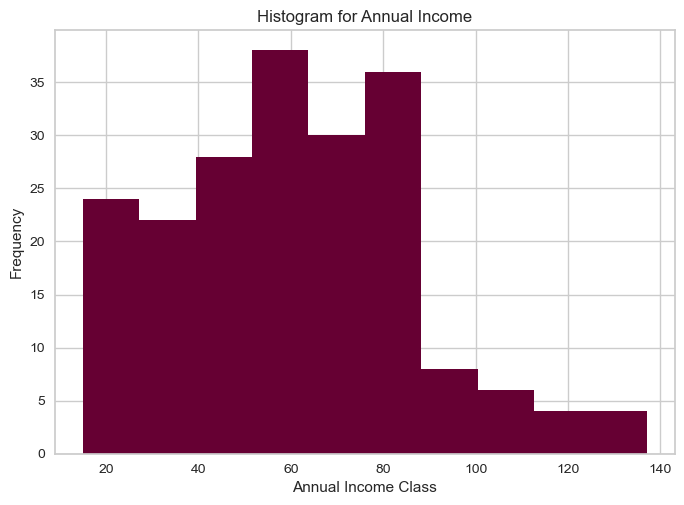

In [543]:
print(customer_data['Annual Income (k$)'].describe())
# histogram
plt.hist(customer_data['Annual Income (k$)'], color='#660033')
plt.title('Histogram for Annual Income')
plt.xlabel('Annual Income Class')
plt.ylabel('Frequency')
plt.show()







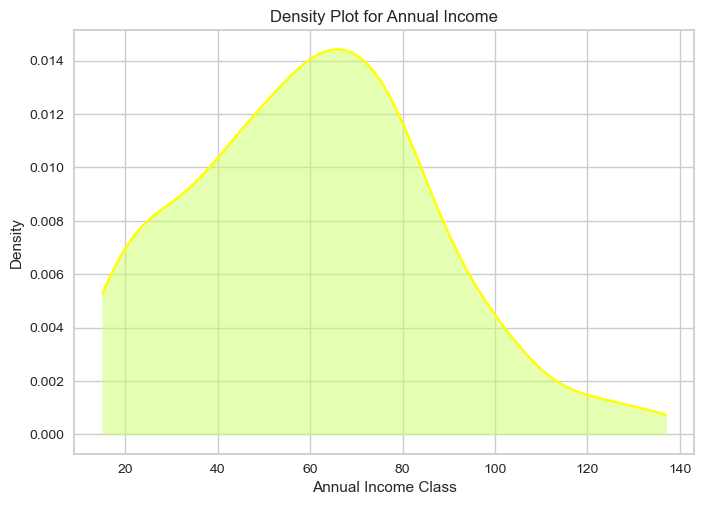

In [544]:
from scipy.stats import gaussian_kde
# create density estimate
density = np.asarray(customer_data['Annual Income (k$)'].dropna())
density_est = np.linspace(density.min(), density.max(), 100)
kde = gaussian_kde(density)
density = kde(density_est)

# plot density estimate
plt.plot(density_est, density, color='yellow')
plt.title('Density Plot for Annual Income')
plt.xlabel('Annual Income Class')
plt.ylabel('Density')

# fill area under density curve
plt.fill_between(density_est, density, color='#ccff66', alpha=0.5)
plt.show()


From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 58-62 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

# Analyzing Spending Score of the Customers

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


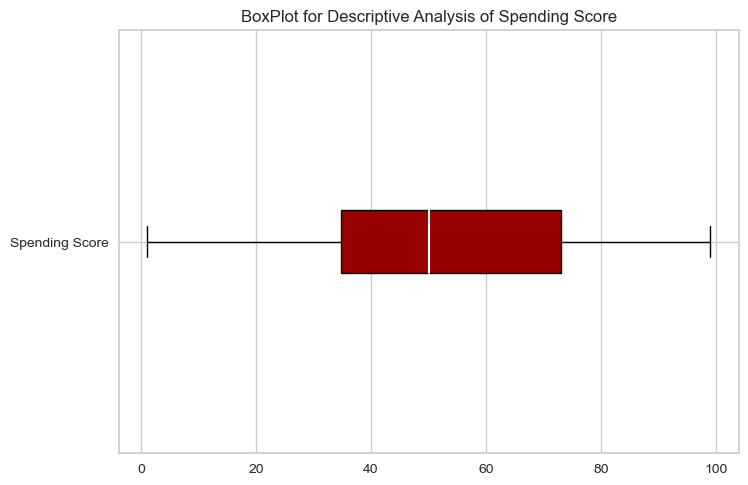

In [545]:
summary = customer_data['Spending Score (1-100)'].describe()
print(summary)
# boxplot
plt.boxplot(customer_data['Spending Score (1-100)'], vert=False,
            patch_artist=True, boxprops=dict(facecolor='#990000', color='black'),
            flierprops=dict(marker='o', markersize=5, markeredgecolor='black'),
            medianprops=dict(color='white', linewidth=1.5),
            labels=['Spending Score'])
plt.title('BoxPlot for Descriptive Analysis of Spending Score')
plt.show()


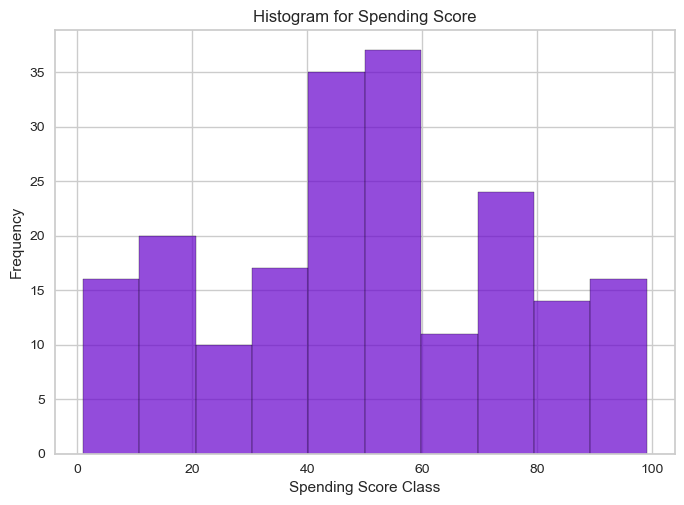

In [546]:
# histogram
plt.hist(customer_data['Spending Score (1-100)'], bins=10, color='#6600cc',
         edgecolor='black', alpha=0.7)
plt.title('Histogram for Spending Score')
plt.xlabel('Spending Score Class')
plt.ylabel('Frequency')
plt.show()


The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 50 and 59 have the highest spending score among all the classes.

# K-means Algorithm


# Determining Optimal Clusters

# 1.By Elbow method

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


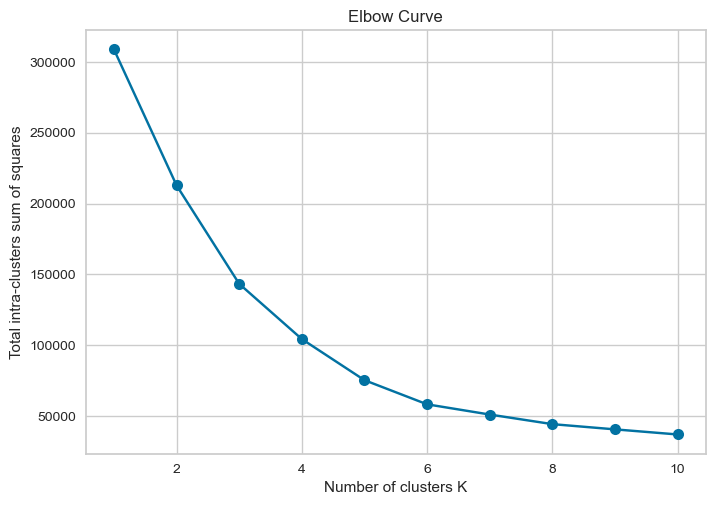

In [547]:
from sklearn.cluster import KMeans
# function to calculate total intra-cluster sum of square
def iss(k):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=100, algorithm='auto', random_state=123)
    kmeans.fit(customer_data.iloc[:,2:5])
    return kmeans.inertia_

# range of k values
k_values = range(1, 11)

# calculate ISS values
iss_values = [iss(k) for k in k_values]

# plot elbow curve
plt.plot(k_values, iss_values, '-o', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Total intra-clusters sum of squares')
plt.title('Elbow Curve')
plt.show()


From the above graph, we conclude that 4 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

# Silhouette method

# Making a silhouette_score for K2

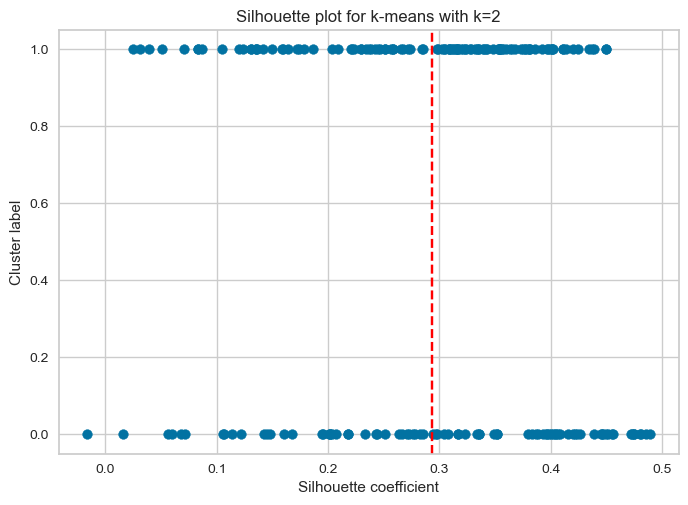

In [548]:
# Run k-means with k=2
k2 = KMeans(n_clusters=2, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s2 = silhouette_score(customer_data.iloc[:, 2:5], k2.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=2')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s2, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k2.labels_), k2.labels_)
plt.show()


# Making a silhouette_score for K3

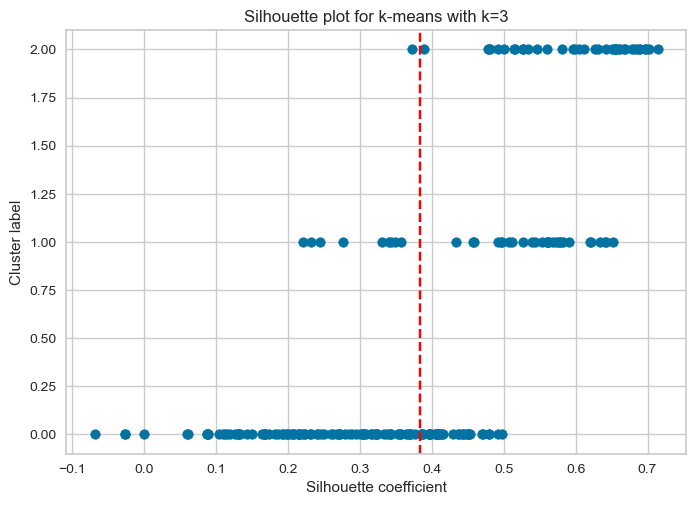

In [549]:
from sklearn.metrics import silhouette_score

k3 = KMeans(n_clusters=3, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])
s3 = silhouette_score(customer_data.iloc[:, 2:5], k3.labels_, metric='euclidean')
plt.figure()
plt.title('Silhouette plot for k-means with k=3')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s3, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k3.labels_), k3.labels_)
plt.show()


# Making a silhouette_score for K4

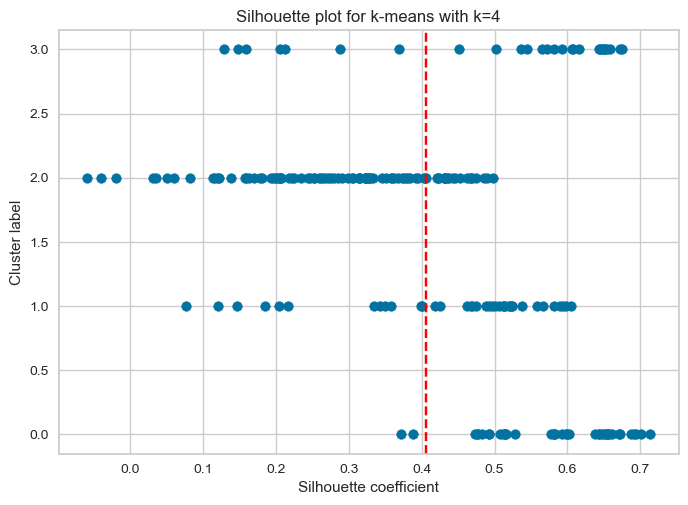

In [550]:
# Run k-means with k=4
k4 = KMeans(n_clusters=4, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s4 = silhouette_score(customer_data.iloc[:, 2:5], k4.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=4')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s4, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k4.labels_), k4.labels_)
plt.show()


# Making a silhouette_score for K5

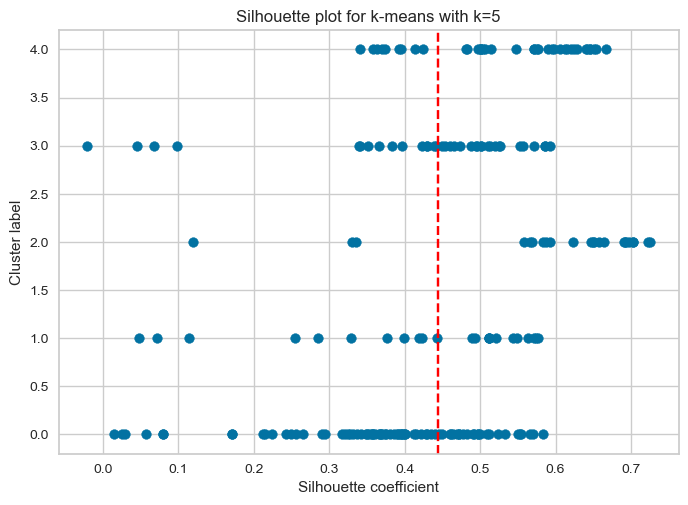

In [551]:
# Run k-means with k=5
k5 = KMeans(n_clusters=5, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s5 = silhouette_score(customer_data.iloc[:, 2:5], k5.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=5')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s5, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k5.labels_), k5.labels_)
plt.show()

# Making a silhouette_score for K6

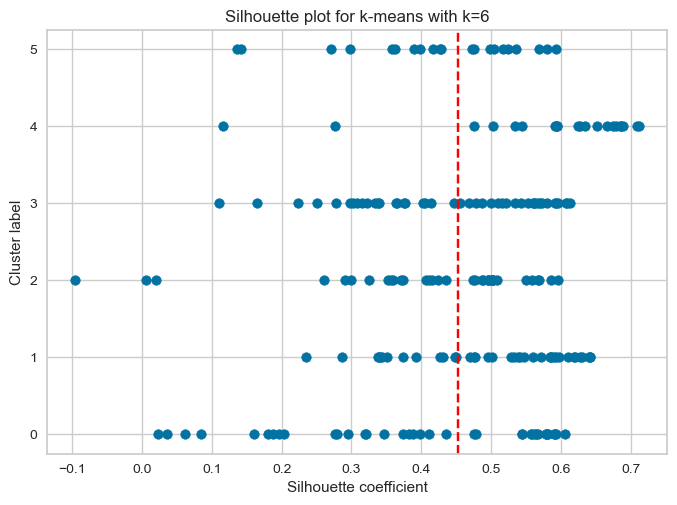

In [552]:
# Run k-means with k=6
k6 = KMeans(n_clusters=6, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s6 = silhouette_score(customer_data.iloc[:, 2:5], k6.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=6')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s6, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k6.labels_), k6.labels_)
plt.show()

# Making a silhouette_score for K7

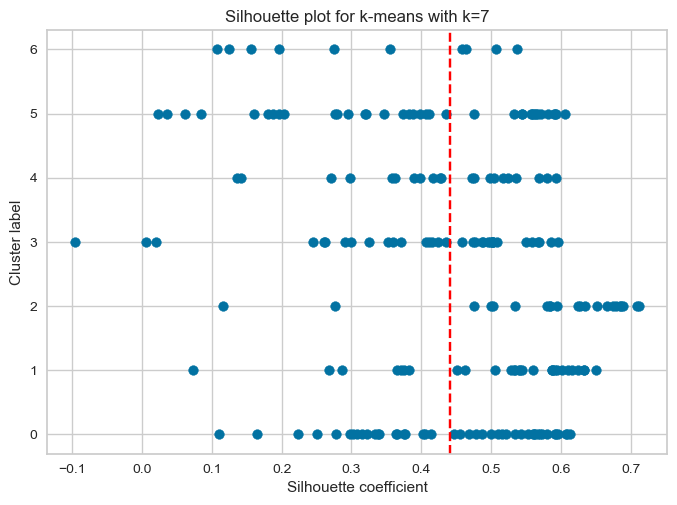

In [553]:
# Run k-means with k=7
k7 = KMeans(n_clusters=7, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s7 = silhouette_score(customer_data.iloc[:, 2:5], k7.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=7')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s7, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k7.labels_), k7.labels_)
plt.show()

# Making a silhouette_score for K8

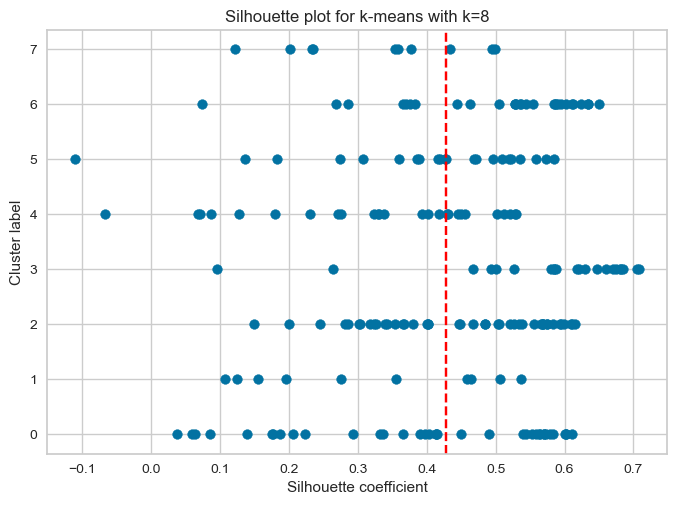

In [554]:
k8 = KMeans(n_clusters=8, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

s8 = silhouette_score(customer_data.iloc[:, 2:5], k8.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=8')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s8, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k8.labels_), k8.labels_)
plt.show()

# Making a silhouette_score for K9

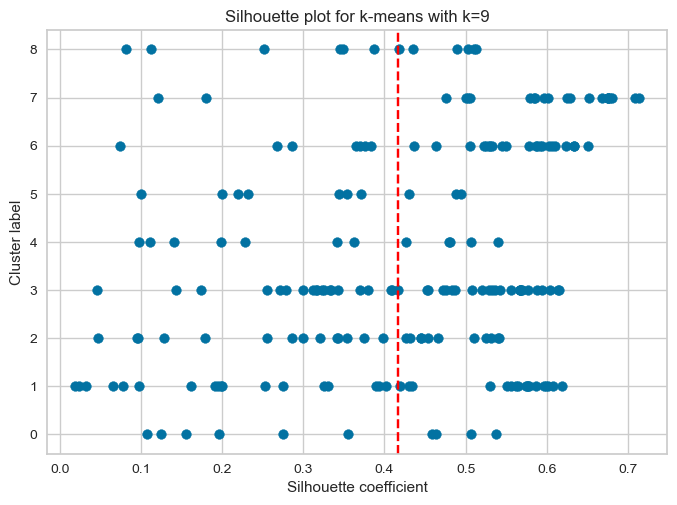

In [555]:
# Run k-means with k=9
k9 = KMeans(n_clusters=9, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s9 = silhouette_score(customer_data.iloc[:, 2:5], k9.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=9')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s9, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k9.labels_), k9.labels_)
plt.show()

# Making a silhouette_score for K10

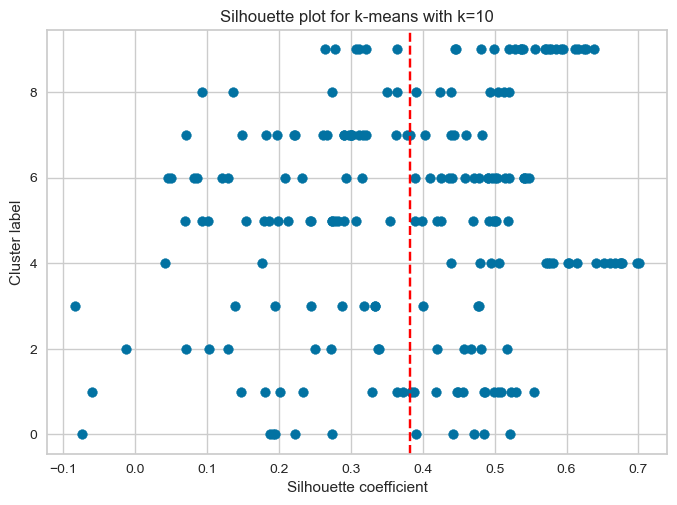

In [556]:
# Run k-means with k=10
k10 = KMeans(n_clusters=10, max_iter=100, n_init=50, algorithm='auto').fit(customer_data.iloc[:, 2:5])

# Calculate the silhouette score
s10 = silhouette_score(customer_data.iloc[:, 2:5], k10.labels_, metric='euclidean')

# Generate the silhouette plot
plt.figure()
plt.title('Silhouette plot for k-means with k=10')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=s10, color='red', linestyle='--')
plt.scatter(silhouette_samples(customer_data.iloc[:, 2:5], k10.labels_), k10.labels_)
plt.show()

# Visualizing the optimal number of clusters 

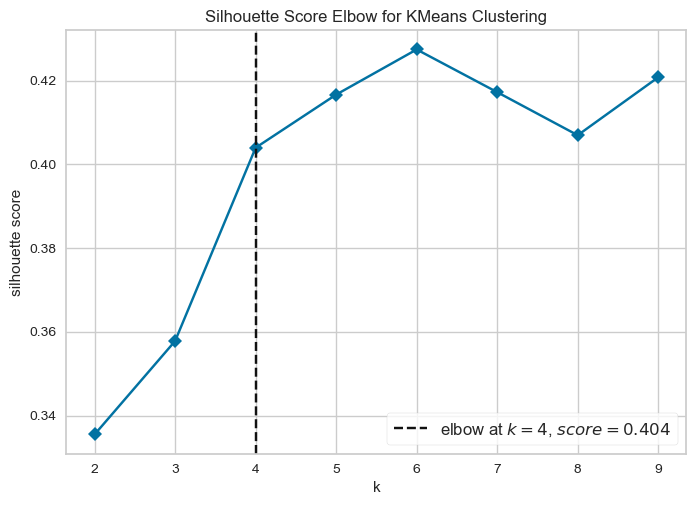

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [557]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Load the customer data into a Pandas DataFrame
customer_data = pd.read_csv("Mall_Customers.csv")

# Select the relevant columns for clustering
X = customer_data.iloc[:, 2:5].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use KElbowVisualizer to determine the optimal number of clusters based on cluster gap statistic
visualizer = KElbowVisualizer(KMeans(random_state=125), k=(2,10), metric='silhouette', timings=False)
visualizer.fit(X_scaled)
visualizer.show()


# Compute gap static
taking k6 as aoptimal cluster

In [558]:
k6 = KMeans(n_clusters=6, max_iter=100, n_init=50)
k6.fit(customer_data.iloc[:, 2:5])

print(k6.cluster_centers_)
print(k6.labels_)

[[27.         56.65789474 49.13157895]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]
 [56.15555556 53.37777778 49.08888889]
 [41.68571429 88.22857143 17.28571429]]
[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 4 2 4 0 3 2 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 1 0 1 5 1 5 1 5 1 0 1 5 1 5 1 5 1 5 1 0 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1]


# Visualizing the Clustering Results using the Principle Components(First Two)

In [559]:
from sklearn.decomposition import PCA

# Select the relevant columns for PCA
X = customer_data.iloc[:, 2:5].values

# Instantiate and fit PCA object
pca = PCA(n_components=3, random_state=125)
pca.fit(X)

# Print explained variance ratio for each component
print(pca.explained_variance_ratio_)


[0.45125272 0.44098465 0.10776263]


In [560]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(customer_data.iloc[:, 2:5])

# Print explained variance ratio and principal component loadings
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PC1 loading:", pca.components_[0])
print("PC2 loading:", pca.components_[1])


Explained variance ratio: [0.45125272 0.44098465]
PC1 loading: [-0.1889742   0.58864102  0.7859965 ]
PC2 loading: [ 0.1309652   0.80837573 -0.57391358]


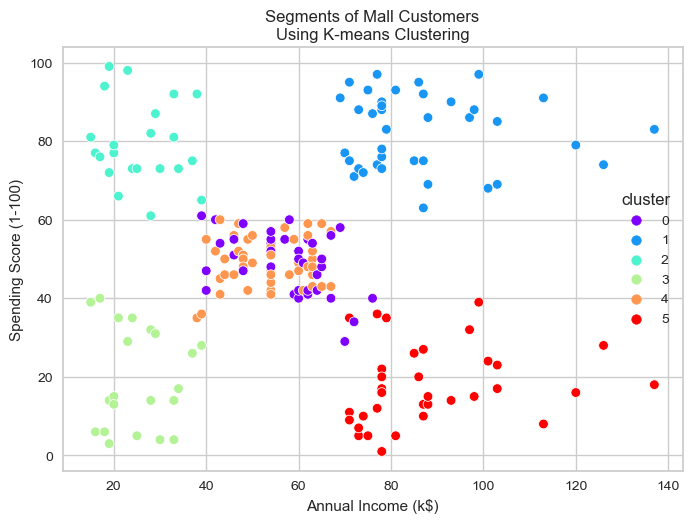

In [561]:
# Assign the cluster labels to a new column in the DataFrame
customer_data['cluster'] = k6.labels_
# Create the scatter plot
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster',palette='rainbow')

# Set the title and axis labels
plt.title('Segments of Mall Customers\nUsing K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()


From the above representation, we see that there is a dissemination of 6 bunches as follows -

Group 5 and 3 - These bunches address the customer_data with the medium pay compensation as well as the medium yearly spend of pay.

Group 0 - This bunch addresses the customer_data having a high yearly pay as well as a high yearly spend.

Group 2 - This bunch means the customer_data with low yearly pay as well as low yearly spend of pay.

Group 1 - This bunch signifies a high yearly pay and low yearly spend.

Group 4 - This bunch addresses a low yearly pay however its high yearly use.

In [562]:
k6 = KMeans(n_clusters=6, max_iter=100, n_init=50)
k6.fit(customer_data.iloc[:, 2:5])

KMeans(max_iter=100, n_clusters=6, n_init=50)

In [563]:
digCluster = k6.labels_
dignm = LabelEncoder().fit_transform(digCluster.astype(str))

In [564]:
pca = PCA(n_components=2)
pcclust = pca.fit_transform(customer_data.iloc[:, 2:5])

In [565]:
palette = sns.color_palette("rainbow", len(np.unique(digCluster)))

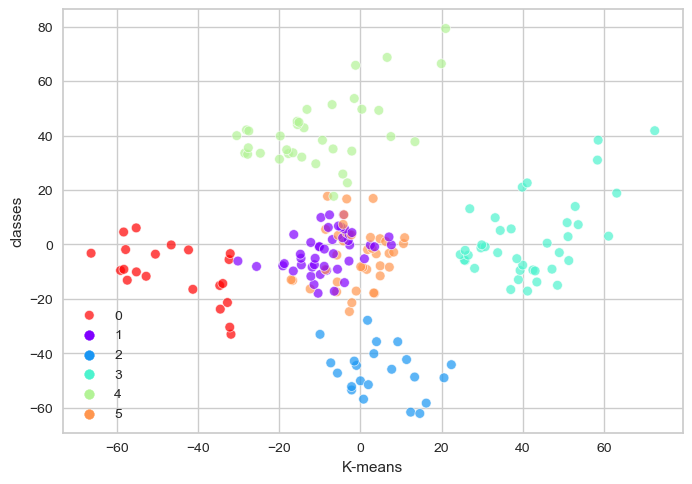

In [566]:
sns.scatterplot(x=pcclust[:, 0], y=pcclust[:, 1], hue=digCluster, palette='rainbow', alpha=0.7)
plt.xlabel('K-means')
plt.ylabel('classes')
plt.legend(list(set(dignm)), loc='lower left')
plt.show()

Group 5 and 1 - These two bunches comprise of clients with medium PCA1 and medium PCA2 score.

Group 0 - This bunch addresses clients having a high PCA2 and a low PCA1.

Group 2 - In this bunch, there are clients with a medium PCA1 and a low PCA2 score.

Group 3 - This bunch contains clients with a high PCA1 pay and a high PCA2.

Group 4 - This contains clients with a high PCA2 and a medium yearly spend of pay.